# Data Preprocessing

In [1]:
from Bio import SeqIO
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'
from collections import Counter
import warnings
warnings.simplefilter("error", RuntimeWarning)

In [2]:
ls

CarrFeatures.py                           bio-cw1-dataset-splitting-and-pca.ipynb   full_vec.npy
PhysioDescriptors.py                      bio-cw1-feature-extractor.ipynb           mean_comp.npy
PhysiochemicalDescriptors.py              bio-cw1-physiochemical-descriptors.ipynb  mito.fasta
__pycache__/                              bio-cw1-preprocessing.ipynb               nucleus.fasta
alphabet.txt                              carr_2010.PDF                             saravana.html
bio-cw1-carr-features.ipynb               cyto.fasta                                secreted.fasta


In [3]:
cyto=list(SeqIO.parse('cyto.fasta', 'fasta'))
mito=list(SeqIO.parse('mito.fasta', 'fasta'))
nucl=list(SeqIO.parse('nucleus.fasta', 'fasta'))
secr=list(SeqIO.parse('secreted.fasta', 'fasta'))
data={'cyto':cyto, 'mito':mito, 'nucl':nucl, 'secr':secr}


dict_keys(['nucl', 'mito', 'cyto', 'secr'])

nucl, 624.46, 500.67, 3314
mito, 375.57, 247.48, 1299
cyto, 664.67, 548.47, 3004
secr, 304.71, 518.45, 1605


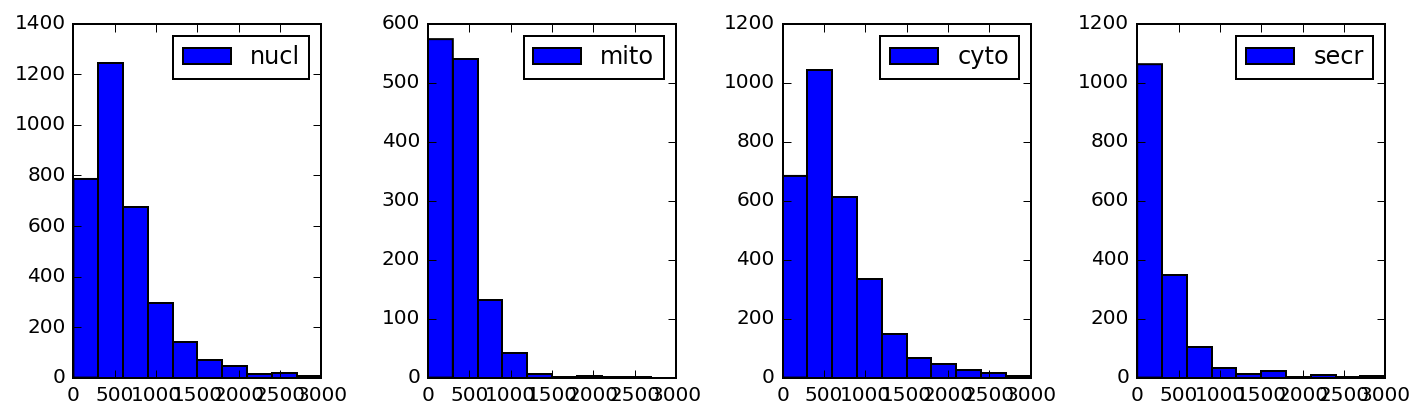

In [36]:
plt.figure(figsize=(10,3))
i=1
for key in data.keys():
    l=[]
    sequences=data[key]
    for s in sequences:
        l.append(len(s.seq))
    plt.subplot(1,4,i)
    plt.hist(l, range=(0,3000), label=key)
    #plt.ylim(0,1500)
    plt.legend()
    plt.tight_layout()
    
    print('%s, %.2f, %.2f, %d' % (key, np.mean(l), np.std(l), len(l)))
    i+=1

In [21]:
plt.hist?

In [9]:
len(nucl)#+len(mito)+len(nucl)+len(secr)

3314

In [4]:
ex=cyto[0]

In [5]:
ex.description

'sp|Q4JIM5|ABL2_MOUSE Abelson tyrosine-protein kinase 2 OS=Mus musculus GN=Abl2 PE=1 SV=1'

In [6]:
ex.id

'sp|Q4JIM5|ABL2_MOUSE'

In [7]:
seq=ex.seq.upper()

In [8]:
print(ex.seq.upper())

MGQQVGRVGEAPGLQQPQPRGIRGSSAARPSGRRRDPAGRTADAGFNVFTQHDHFASCVEDGFEGDKTGGSSPEVLHRPFGCDAESQALNEAIRWSSKENLLGATESDPNLFVALYDFVASGDNTLSITKGEKLRVLGYNQNGEWSEVRSKNGQGWVPSNYITPVNSLEKHSWYHGPVSRSAAEYLLSSLINGSFLVRESESSPGQLSISLRYEGRVYHYRINTTTDSKVYVTAESRFSTLAELVHHHSTVADGLVTTLHYPAPKCNKPTVYGVSPIHDKWEMERTDITMKHKLGGGQYGEVYVGVWKKYSLTVAVKTFKEDTMEVEEFLKEAAVMKEIKHPNLVQLLGVCTLEPPFYIVTEYMPYGNLLDYLRECSREEVTAVVLLYMATQISSAMEYLEKKNFIHRDLAARNCLVGENHVVKVADFGLSRLMTGDTYTAHAGAKFPIKWTAPESLAYNTFSIKSDVWAFGVLLWEIATYGMSPYPGIDLSQVYDLLEKGYRMEQPEGCPPKVYELMRACWKWSPADRPSFAETHQAFETMFHDSSISEEVAEELGRTASSSSVVPYLPRLPLLPSKTRTLRKQGENKENLDGGLDAAESLASSSAPAGFIRSTQASSGSPALPRKQRDKSPSSLLEDAKETCFTRDRKGGFFSSFMKKRNAPTPPKRSSSFREMENQPHKKYELTGNFSPVASLQNADGFSVAPSQQEPNLVPAKCYGGSFAQRNLCADDDSGGGGGSGTAGGGWSGITGFFTPRLIKKTLGLRAGKPTASDDTSKPFPRSNSTSSMSSGLPEQDRMAMTLPRNCQRSKLQLERTVSTSSQPEENVDRANDMLPKKSEEGAAPARERPKAKLLPRGATALPLRAPDPAITESDSPGVGVAGVAAAPKGKERNGGTRLGVAGVPEDGEQLGWSSPAKAVAVLPTTHNHKVPVLISPTLKHTPADVQLIGTDSQGNKFKLLSEHQVTSSGDKDRPRRVKPKCAPPPPPVMRLLQHPSTCS

In [9]:
seq_count=Counter(list(str(seq)))
seq_count

Counter({'A': 97,
         'C': 17,
         'D': 51,
         'E': 81,
         'F': 35,
         'G': 96,
         'H': 26,
         'I': 30,
         'K': 72,
         'L': 99,
         'M': 22,
         'N': 40,
         'P': 96,
         'Q': 44,
         'R': 63,
         'S': 118,
         'T': 73,
         'V': 77,
         'W': 13,
         'Y': 32})

In [10]:
len(seq_count)

20

<img src="http://russianbridesglobal.com/wp-content/uploads/2016/12/amino-acid-one-letter-code-hclt1onk.png" width="400"/>

In [11]:
seq_len = len(seq)
seq_count['S']/seq_len

0.09983079526226735

In [12]:
def preprocessing(data):
    AA_compositional_all = []
    AA_centrodial_all=[]
    for key in data.keys():
        cat=data[key]
        AA_compositional=np.zeros((len(cat),21))
        AA_centrodial=np.zeros((len(cat),20))
        alphabet=sorted(Counter(cat[0].seq).keys())
        if len(alphabet) != 20:
            raise ValueError('Incorrect amino acid alphabet length!')
        for idx, item in enumerate(cat):
            seq_parsed =list(str(item.seq))
            seq_len=len(seq_parsed)
            seq_count=Counter(seq_parsed)
            # get centrodial info
            AA_centrodial[idx,:] = cent_mean(seq_parsed, alphabet)
            # get compositional info
            for pos, letter in enumerate(alphabet):
                AA_compositional[idx,pos] = seq_count[letter]/seq_len
                AA_compositional[idx,20] = seq_len
        AA_compositional_all.append(AA_compositional)
        AA_centrodial_all.append(AA_centrodial)
        print('%d sequences of type %s processed' % (AA_compositional.shape[0], key))
    return AA_compositional_all, AA_centrodial_all, alphabet

def cmp_mean(comp,alphabet):
    mean = [np.mean(arr[:,:-1], 0) for arr in comp]
    mean = sum(mean)/4
    return np.array(mean)

def cent_mean(seq, alphabet):
    pos_vector=np.arange(1,len(seq)+1,1)
    seq_len=len(seq)
    centroidal_position=np.zeros((1,20))
    for idx, letter in enumerate(alphabet):
        pos = [pos_vector[idx] for idx, aa in enumerate(seq) if aa == letter]
        try:
            centroidal_position[:,idx] = np.mean(pos)/seq_len
        except:
            centroidal_position[:,idx] = 0
    return centroidal_position

def carr_type1(seq_comp, mean_comp):
    return (seq_comp[:-1]-mean_comp) / ((1-mean_comp)*mean_comp/seq_comp[-1])**0.5

    

In [13]:
comp, cent, alphabet = preprocessing(data)

3314 sequences of type nucl processed
1299 sequences of type mito processed
1605 sequences of type secr processed
3004 sequences of type cyto processed


In [14]:
mean_cmp=cmp_mean(comp,alphabet)
mean_cnt=cmp_mean(cent,alphabet)

In [15]:
np.save('mean_comp.npy', mean_cmp)

In [16]:
mean_comp = np.load('mean_comp.npy')

In [17]:
mean_comp

array([ 0.0690411 ,  0.02379254,  0.05166308,  0.06556639,  0.0380166 ,
        0.06494177,  0.02303357,  0.04938113,  0.06829746,  0.09093341,
        0.02245051,  0.04545023,  0.05419684,  0.04258471,  0.0546522 ,
        0.0813136 ,  0.05330818,  0.059649  ,  0.01175609,  0.02947515])

In [18]:
cent_mean(seq_parsed, alphabet)

NameError: name 'seq_parsed' is not defined

In [ ]:
plt.hist(comp[0][:,9],  edgecolor='None', label=alphabet[9])
plt.hist(comp[0][:,12], edgecolor='None', label=alphabet[12])
plt.hist(comp[0][:,18], edgecolor='None', label=alphabet[18])
plt.legend(loc=0, frameon=False);

In [20]:
alphabet

['A',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'K',
 'L',
 'M',
 'N',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'V',
 'W',
 'Y']

In [21]:
import pickle

In [23]:
with open('alphabet.txt', 'wb') as fp:
    pickle.dump(alphabet, fp)